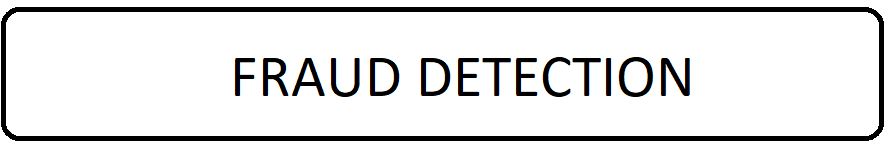

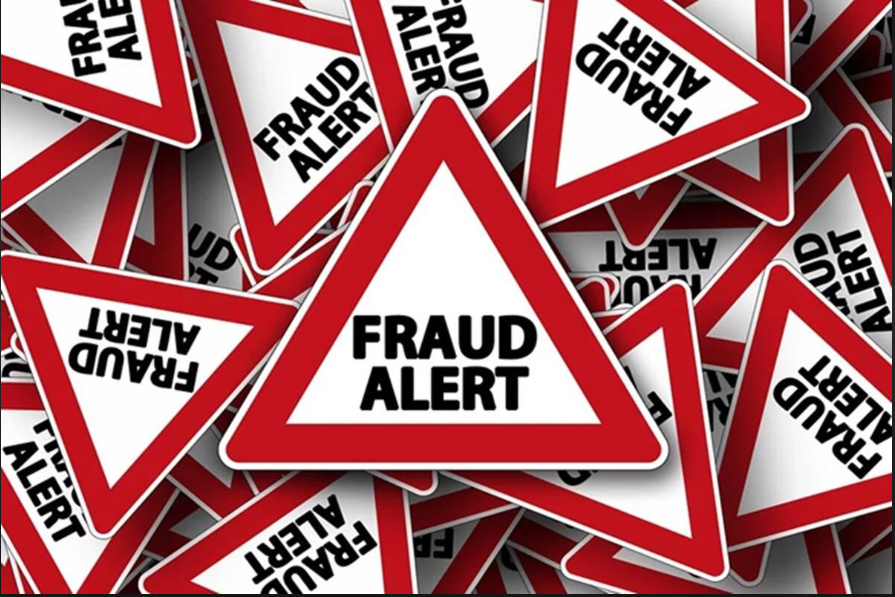

## 🎯About dataset

Problem Statement: PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. 
The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.
Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' .
1: Fraudulent transactions
0: Clean transactions

## 🎯Algorithms Employed

- 🎯 Binary class Logistic Regression
- 🎯 Random Forest Classifier
- 🎯 Boosting Classifier

## 🎯Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

## 🎯LOAD AND READ DATASET

In [127]:
train_df=pd.read_csv('train (1).csv')
test_df=pd.read_csv('test_share.csv')
geo_score_df=pd.read_csv('Geo_scores.csv')
instance_score_df=pd.read_csv('instance_scores.csv')
lambda_wts_df=pd.read_csv('Lambda_wts.csv')
qsets_df=pd.read_csv('Qset_tats.csv')

## 🎯Information about Dataset

In [128]:
train_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [129]:
test_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [131]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56962 non-null  int64  
 1   Group           56962 non-null  object 
 2   Per1            56962 non-null  float64
 3   Per2            56962 non-null  float64
 4   Per3            56962 non-null  float64
 5   Per4            56962 non-null  float64
 6   Per5            56962 non-null  float64
 7   Per6            56962 non-null  float64
 8   Per7            56962 non-null  float64
 9   Per8            56962 non-null  float64
 10  Per9            56962 non-null  float64
 11  Dem1            56962 non-null  float64
 12  Dem2            56962 non-null  float64
 13  Dem3            56962 non-null  float64
 14  Dem4            56962 non-null  float64
 15  Dem5            56962 non-null  float64
 16  Dem6            56962 non-null  float64
 17  Dem7            56962 non-null 

In [132]:
geo_score_df.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [133]:
geo_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [134]:
instance_score_df.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [135]:
instance_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [136]:
lambda_wts_df.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [137]:
lambda_wts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [138]:
qsets_df.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [139]:
qsets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [140]:
geo_score_df['id'].value_counts().head()

26674     5
149679    5
114110    5
24969     5
262179    5
Name: id, dtype: int64

In [141]:
instance_score_df['id'].value_counts().head()

173444    5
240342    5
147158    5
83677     5
127535    5
Name: id, dtype: int64

In [142]:
qsets_df['id'].value_counts().head()

9983      5
146106    5
133237    5
262326    5
79108     5
Name: id, dtype: int64

In [143]:
lambda_wts_df['Group'].value_counts().head()

Grp936     1
Grp1128    1
Grp341     1
Grp63      1
Grp173     1
Name: Group, dtype: int64

#### We can see that in the geo_score dataset, instance score dataset , qset_tat df the 'id' got repeated that each 'id' have multiple values assigned  to them and we can minimise by taking mean of all values and assign to that particular 'id' corresondingly  

## 🎯Check Null Values

In [144]:
geo_score_df['geo_score'].isnull().sum()

71543

In [145]:
instance_score_df['instance_scores'].isnull().sum()

0

In [146]:
qsets_df['qsets_normalized_tat'].isnull().sum()

103201

In [147]:
lambda_wts_df['Group'].isnull().sum()

0

<AxesSubplot:xlabel='geo_score'>

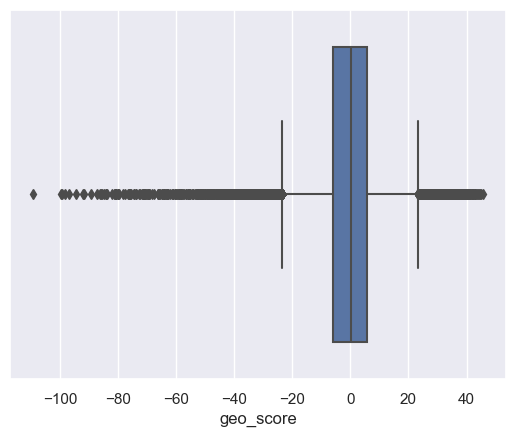

In [148]:
sns.boxplot(geo_score_df['geo_score'])

In [149]:
geo_score_df['geo_score']=geo_score_df['geo_score'].fillna(geo_score_df['geo_score'].median())

In [150]:
geo_score_df['geo_score'].isnull().sum()

0

<AxesSubplot:xlabel='qsets_normalized_tat'>

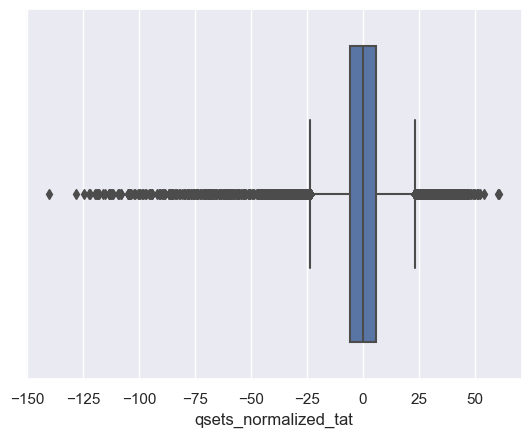

In [151]:
sns.boxplot(qsets_df['qsets_normalized_tat'])

## 🎯GROUPING :

In [152]:
qsets_df['qsets_normalized_tat']=qsets_df['qsets_normalized_tat'].fillna(qsets_df['qsets_normalized_tat'].median())

In [153]:
qsets_df['qsets_normalized_tat'].isnull().sum()

0

In [154]:
geo_score_df=geo_score_df.groupby('id').mean()

In [155]:
geo_score_df.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [156]:
instance_score_df=instance_score_df.groupby('id').mean()

In [157]:
instance_score_df.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [158]:
qsets_df=qsets_df.groupby('id').mean()

In [159]:
qsets_df.head()

,qsets_normalized_tat
id,
0,0.214
1,-0.110
2,1.110
3,-0.676
4,-0.240


## 🎯 Handling Missing Values of Train and Test Data

In [160]:
train_df.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [161]:
test_df.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

##### Zero values in the column to be replaced with median 

In [162]:
def zeroes(col):
    train_df[col]=train_df[col].replace(0,train_df[col].median())


for i in train_df.select_dtypes(exclude='object').columns:
    zeroes(i)

In [163]:
def zeroes(col):
    test_df[col]=test_df[col].replace(0,test_df[col].median())


for i in test_df.select_dtypes(exclude='object').columns:
    zeroes(i)

In [164]:
def null(col):
    train_df[col]=train_df[col].fillna(train_df[col].median())


for i in train_df.select_dtypes(exclude='object').columns:
    null(i)

## 🎯 Merging the datasets

In [165]:
train_df['data']='Train'
test_df['data']='Test'

In [166]:
dataset=pd.concat([train_df,test_df],axis=0)
dataset.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,Train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,Train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,Train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,Train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,Train


In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              284807 non-null  int64  
 1   Group           284807 non-null  object 
 2   Per1            284807 non-null  float64
 3   Per2            284807 non-null  float64
 4   Per3            284807 non-null  float64
 5   Per4            284807 non-null  float64
 6   Per5            284807 non-null  float64
 7   Per6            284807 non-null  float64
 8   Per7            284807 non-null  float64
 9   Per8            284807 non-null  float64
 10  Per9            284807 non-null  float64
 11  Dem1            284807 non-null  float64
 12  Dem2            284807 non-null  float64
 13  Dem3            284807 non-null  float64
 14  Dem4            284807 non-null  float64
 15  Dem5            284807 non-null  float64
 16  Dem6            284807 non-null  float64
 17  Dem7       

In [169]:
dataset=pd.merge(dataset,instance_score_df,on='id',how='left')

In [170]:
dataset=pd.merge(dataset,qsets_df,on='id',how='left')

In [171]:
dataset=pd.merge(dataset,lambda_wts_df,on='Group',how='left')

In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [173]:
dataset.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int64

## 🎯Descriptive statistics(Univariate analysis)

In [174]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,284807.0,142403.499896,82216.410383,1.000000,71202.500000,142403.000000,213604.500000,284806.000000
Per1,284807.0,0.667237,0.652610,-18.136667,0.360000,0.673333,1.106667,1.483333
Per2,284807.0,0.666964,0.550265,-23.573333,0.466667,0.690000,0.933333,8.020000
Per3,284807.0,0.667211,0.505090,-15.443333,0.370000,0.726667,1.010000,3.793333
Per4,284807.0,0.667153,0.471610,-1.226667,0.383333,0.660000,0.913333,6.293333
Per5,284807.0,0.666975,0.459858,-37.246667,0.436667,0.650000,0.870000,12.266667
Per6,284807.0,0.666822,0.443956,-8.053333,0.410000,0.576667,0.800000,25.100000
Per7,284807.0,0.666854,0.412218,-13.853333,0.483333,0.680000,0.856667,40.863333
Per8,284807.0,0.666721,0.398072,-23.740000,0.596667,0.673333,0.776667,7.336667
Per9,284807.0,0.667103,0.365800,-3.810000,0.453333,0.650000,0.866667,5.863333


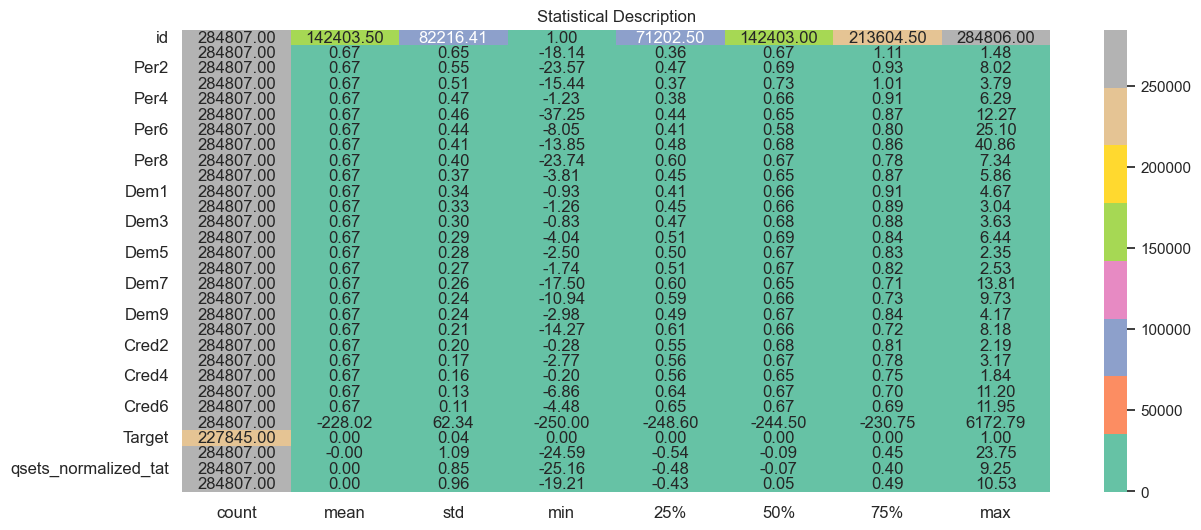

In [175]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(dataset)

In [176]:
## 🎯Distributions

## 🎯Splitting data into train and test

In [ ]:
train_df=dataset[dataset['data']=='Train']
test_df=dataset[dataset['data']=='Test']

## 🎯 Data Imbalance Check

In [ ]:
train_df['Target'].value_counts()

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= train_df.Target , data= train_df, palette ='husl')
ax.set_title('Fraud or not ')
plt.show()

In [ ]:
plt.figure(figsize=(8,8),dpi=100)
plt.pie(train_df['Target'].value_counts()*100/len(dataset),
        labels=train_df['Target'].value_counts().index,
        autopct='%.3f%%',shadow=True,explode=[0.1 for i in range(2)],colors=sns.color_palette('Set1'))
plt.show()


## 🎯Dropping Unnecessary columns

In [ ]:
idv_train=train_df.drop(['id','Group','Target','data'],axis=1)
idv_test=test_df.drop(['id','Group','Target','data'],axis=1)
dv_train=train_df['Target']
dv_test=test_df['Target']

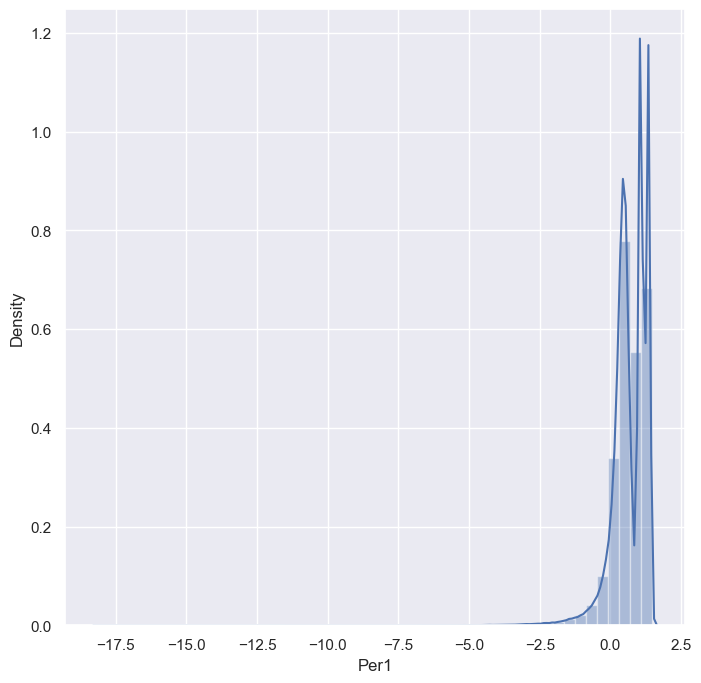

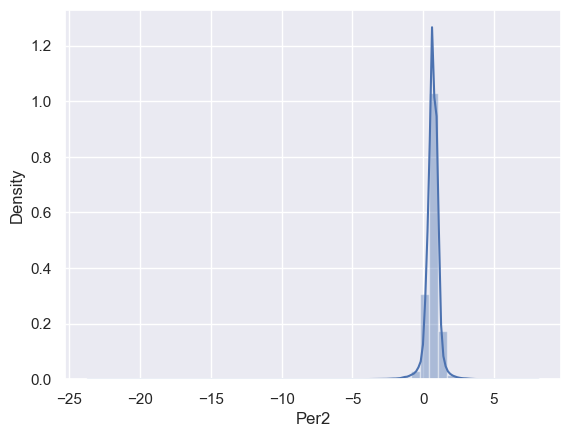

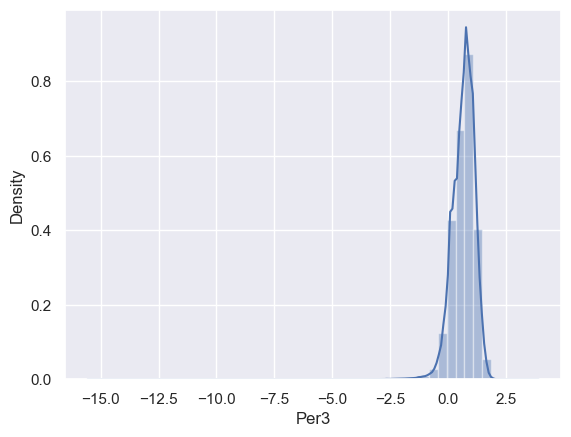

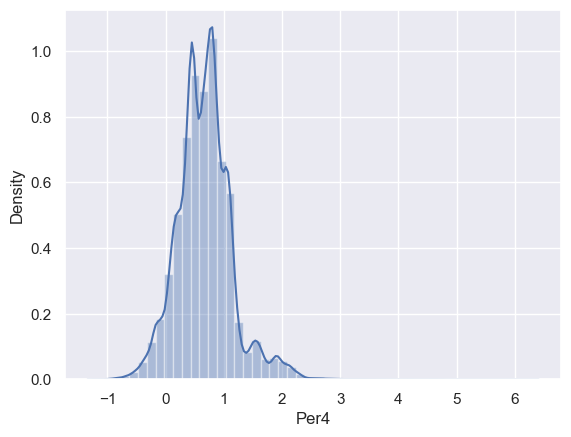

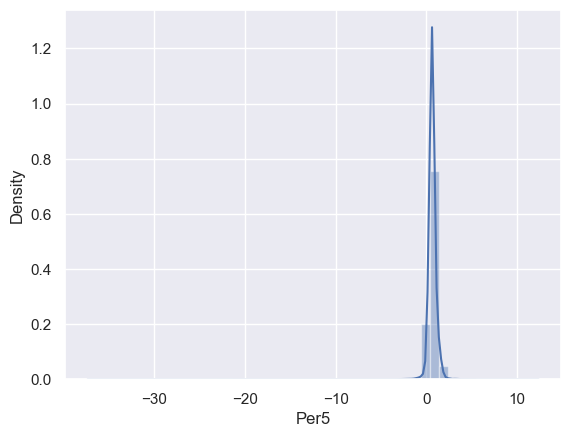

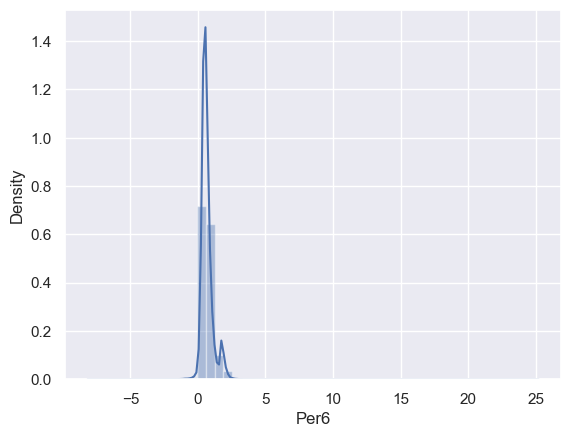

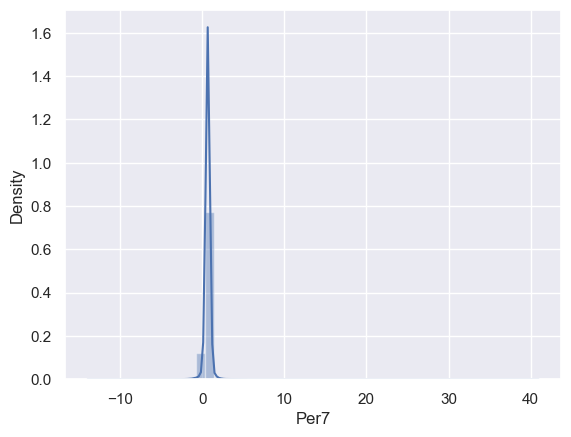

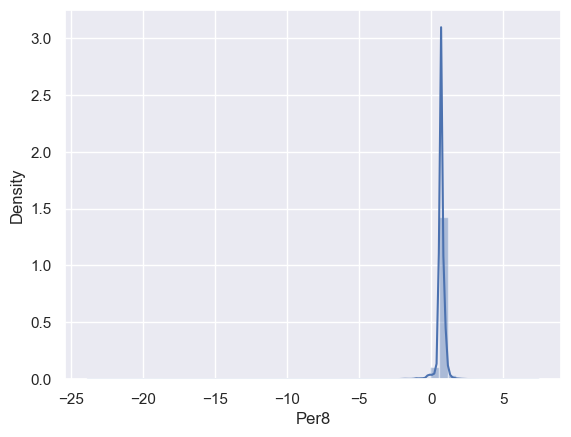

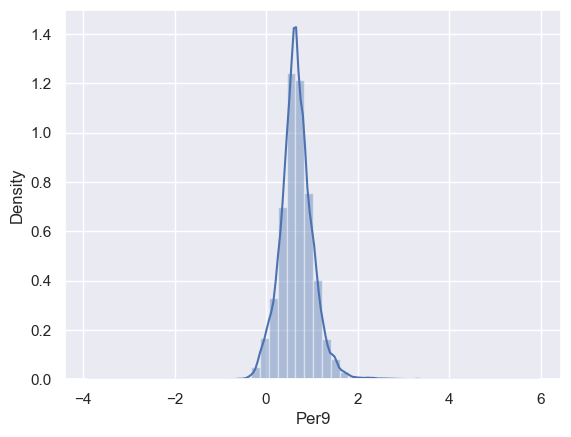

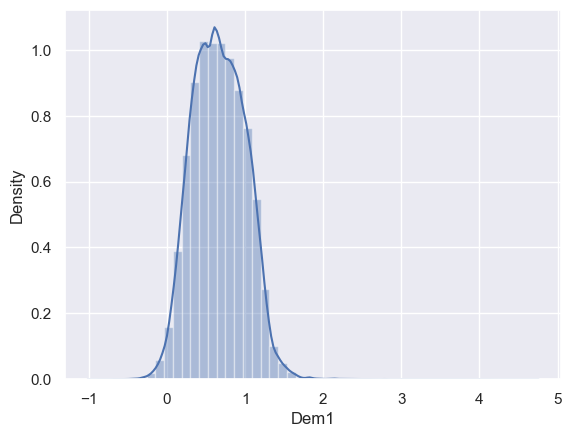

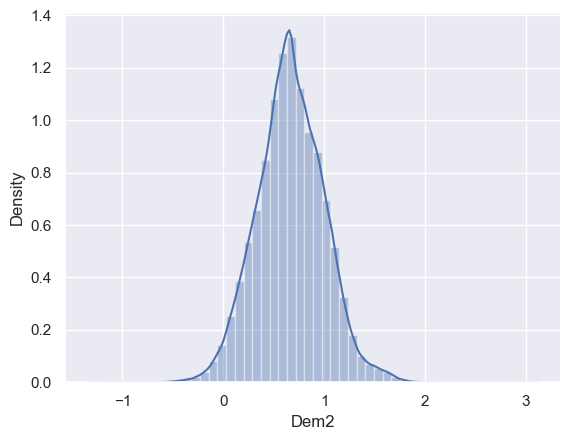

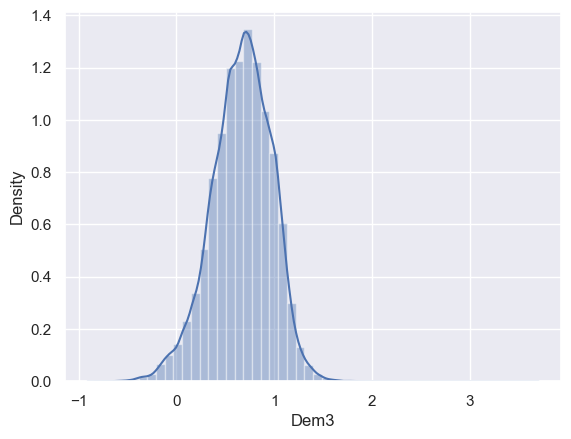

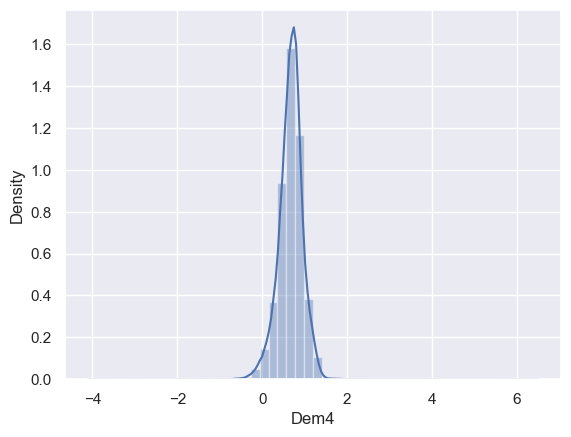

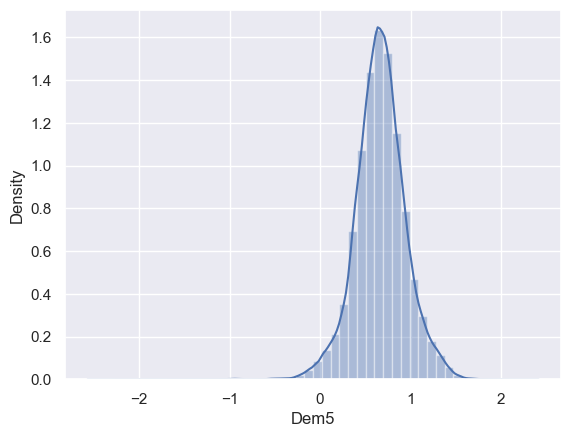

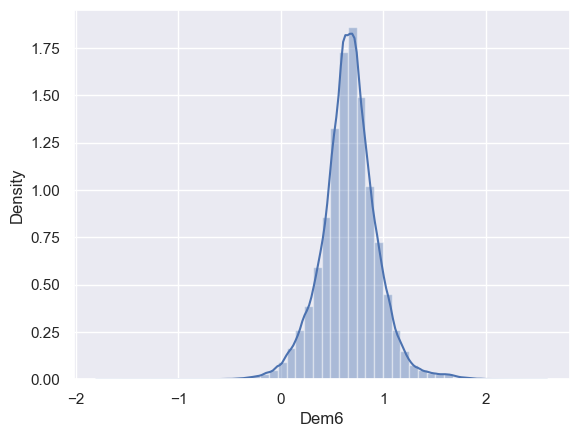

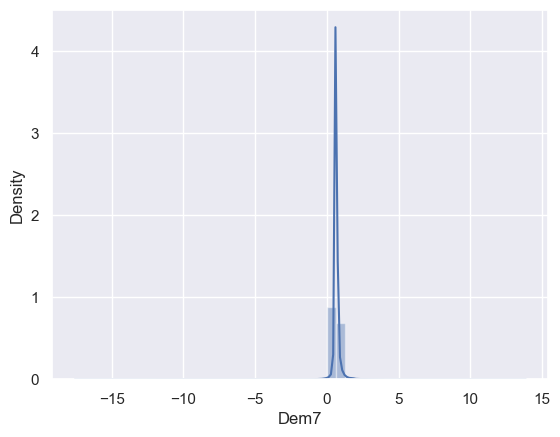

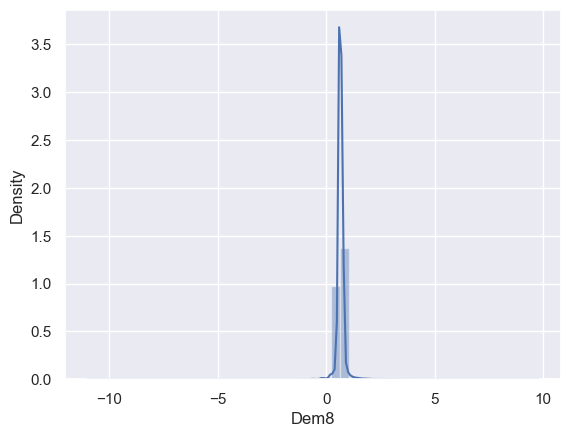

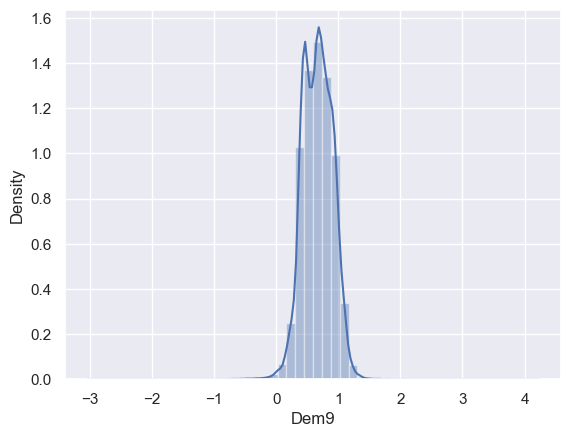

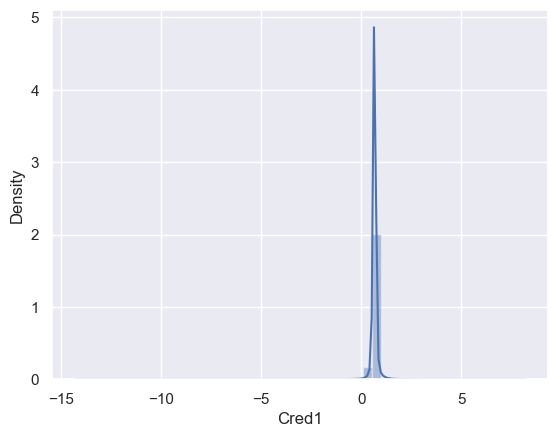

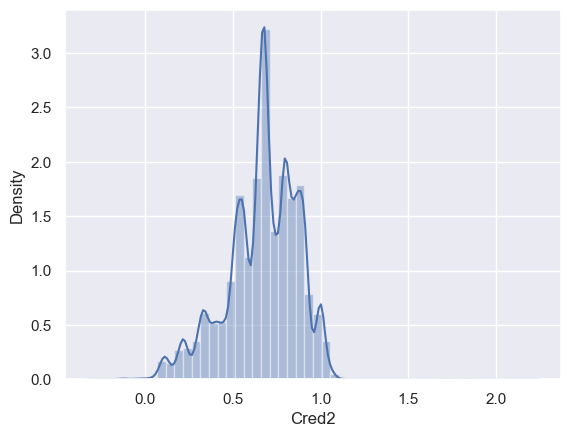

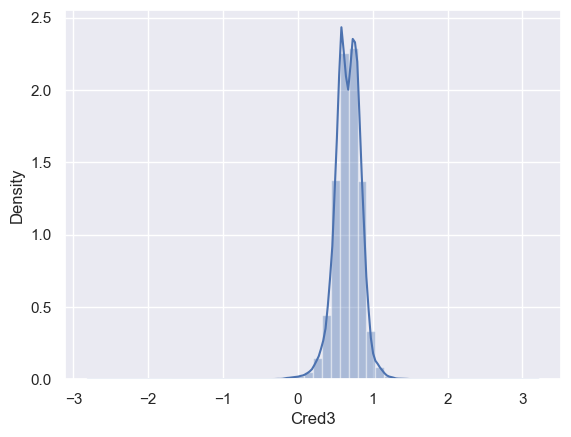

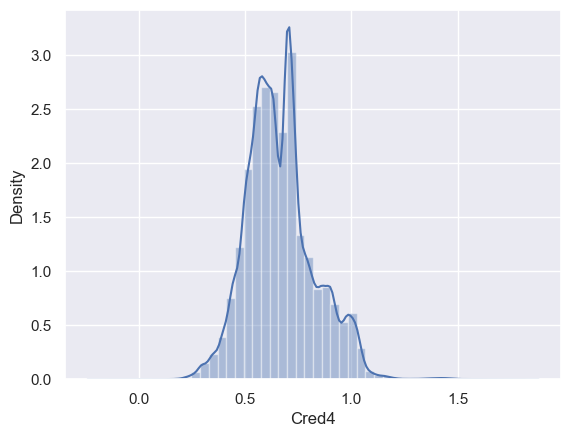

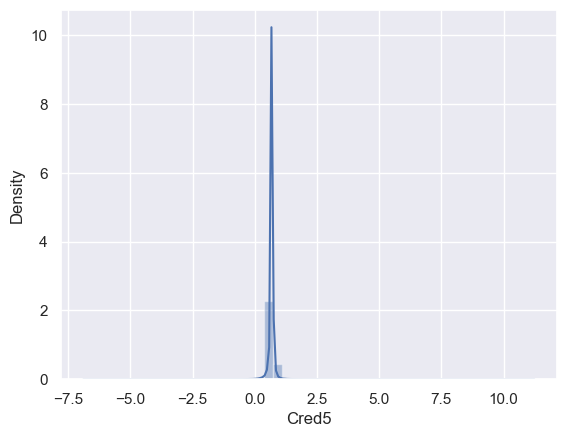

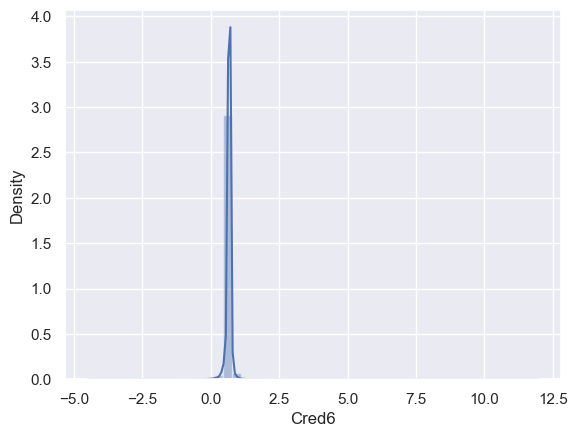

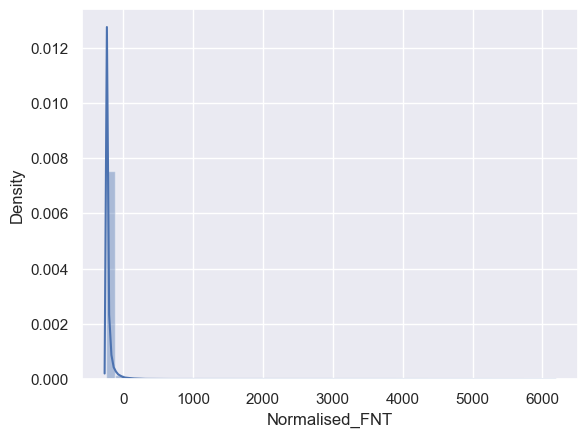

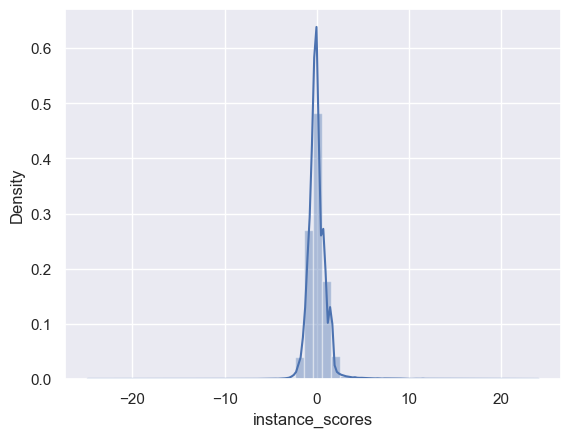

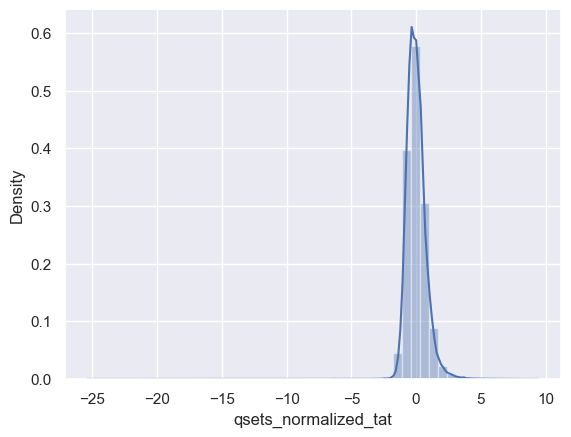

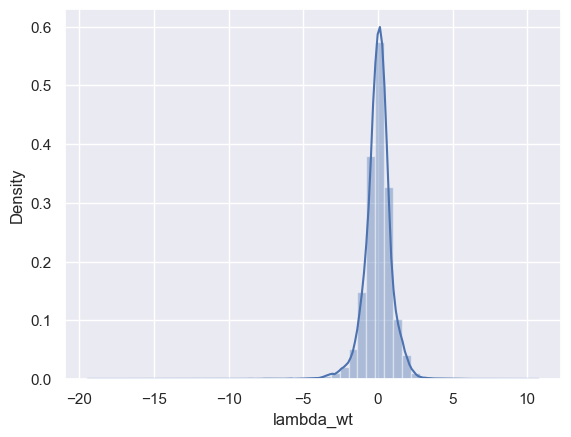

In [178]:
plt.figure(figsize=(8,8))
def dist(col):
    sns.distplot(dataset[col])
    plt.show()

for i in idv_train.columns:
    dist(i)

## 🎯Feature scaling 

In [179]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(idv_train)

In [180]:
x_sc

array([[ 6.17016216e-01, -1.60541894e-01, -3.69322289e-01, ...,
        -5.48565461e-02, -8.24947803e-01, -1.36070832e-01],
       [-2.95529065e-01,  9.82741971e-01,  4.27754098e-01, ...,
         4.76529263e-01,  1.63093164e-01,  6.88602704e-01],
       [ 7.08780546e-01, -9.57191822e-01,  5.52914853e-01, ...,
         1.42935899e+00, -5.07363206e-01, -5.32749242e-01],
       ...,
       [ 6.01722161e-01,  1.61766855e-01,  4.73865955e-01, ...,
        -1.18989316e-01,  1.01820622e-02,  1.56218522e-01],
       [-3.56705285e-01,  6.30026736e-01,  9.81096383e-01, ...,
        -6.04566004e-01,  4.50095540e-01,  1.59678748e+00],
       [ 5.20153867e-01, -2.09192272e-01,  5.52914853e-01, ...,
        -2.01445735e-01,  6.45351255e-01, -3.65060454e-04]])

In [181]:
x_sc=pd.DataFrame(x_sc,columns=idv_train.columns)

In [182]:
x_sc


,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,instance_scores,qsets_normalized_tat,lambda_wt
0,0.617016,-0.160542,-0.369322,0.210941,1.227984,2.983113,-0.787317,0.855954,0.535941,-0.607995,...,-0.289300,1.700130,1.530565,-0.395173,0.147910,0.058684,-0.286352,-0.054857,-0.824948,-0.136071
1,-0.295529,0.982742,0.427754,1.617509,0.129315,-0.091972,0.343849,0.291403,-1.302987,-0.578600,...,0.064050,0.117303,-0.613146,0.019414,-0.834773,-0.120550,-0.322781,0.476529,0.163093,0.688603
2,0.708781,-0.957192,0.552915,-1.153219,-1.272934,0.380541,-1.469225,0.224985,-1.202847,-0.020077,...,-0.321423,-1.399574,0.554411,0.019414,0.147910,0.058684,-0.081946,1.429359,-0.507363,-0.532749
3,-0.045726,0.769897,0.164258,0.578486,0.165455,-0.721990,0.696837,-0.082197,-0.492766,1.263546,...,0.064050,0.892228,-1.397898,-0.913407,1.327130,0.835366,-0.351560,0.641442,-0.356805,0.751236
4,-0.162981,0.630027,-0.145350,-0.531218,0.230508,-0.466982,0.448141,0.324612,-0.410833,0.264084,...,0.128295,-0.690599,-0.842830,0.309624,0.295313,0.058684,-0.315940,-0.430491,-0.742611,0.625969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.290431,0.630027,-0.257336,-0.191946,1.603845,2.653104,-0.161565,1.088416,-0.847806,-0.402224,...,-0.160809,1.634179,-0.115499,-0.830490,0.098776,0.237919,-0.298536,-0.403006,-0.643807,0.782553
227841,1.065642,0.113116,-1.199336,0.232145,0.469035,-0.451982,0.159333,-0.190125,0.381180,-0.676586,...,0.481645,0.315156,-0.402603,0.392542,-0.146895,-0.090678,-0.351560,-0.366359,0.450096,-1.023378
227842,0.601722,0.161767,0.473866,0.486600,-0.354967,-0.609486,0.038996,-0.115405,-0.101311,0.597238,...,0.353155,1.024131,0.190746,0.185248,-0.024060,0.058684,-0.351560,-0.118989,0.010182,0.156219
227843,-0.356705,0.630027,0.981096,0.578486,0.570228,0.523045,0.351871,0.133661,0.963811,-0.745177,...,-0.610528,-0.113526,1.377443,-0.789031,0.737520,0.387281,-0.237781,-0.604566,0.450096,1.596787


## 🎯Handling Imbalance Data (Over sampling technique)

In [183]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,dv_train)

In [184]:
y_smote.value_counts()

0.0    227451
1.0    227451
Name: Target, dtype: int64

## 🎯Splitting Data into Train and Test for evaluation

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.25,random_state=123)

## 🎯Model Building 

In [186]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [187]:
#logistic
logistic=LogisticRegression()

In [188]:
#Randomforest
rf=RandomForestClassifier()

In [189]:
#Boosting
xgb=XGBClassifier()

In [190]:
models=[(logistic,'logistic',1),(rf,'randomforest',2),(xgb,'XGBoost',3)]

## 🎯Model Training and Evaluation

In [191]:
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_train,y_train,cv=5).mean()
    Test_acc=cross_val_score(model,x_test,y_test,cv=5).mean()
    varience=abs(Train_acc-Test_acc)
    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)
    print('varience:',varience)
    if varience>10 :
        print(f'Overfitting {model_name}')

Cross validation of logistic
Train accuracy: 0.9344004259751821
Test accuracy: 0.9354500913362139
varience: 0.001049665361031793
Cross validation of randomforest
Train accuracy: 0.9998681032233903
Test accuracy: 0.9994636241763606
varience: 0.0004044790470296711
Cross validation of XGBoost
Train accuracy: 0.9996863787746623
Test accuracy: 0.9993405229035218
varience: 0.0003458558711404436


In [193]:
from sklearn.metrics import classification_report
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Classification report of {model_name}')
    print('====================================================================')
    Train_cvr=classification_report(y_train,y_pred_train)
    Test_cvr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cvr)
    print('===================================================================')
    print('Test classification report:',Test_cvr)

Classification report of logistic
Train classification report:               precision    recall  f1-score   support

         0.0       0.90      0.97      0.94    170483
         1.0       0.97      0.90      0.93    170693

    accuracy                           0.93    341176
   macro avg       0.94      0.93      0.93    341176
weighted avg       0.94      0.93      0.93    341176

Test classification report:               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     56968
         1.0       0.97      0.90      0.93     56758

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726

Classification report of randomforest
Train classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    170483
         1.0       1.00      1.00      1.00    170693

    accuracy            

Confusion matrix of logistic


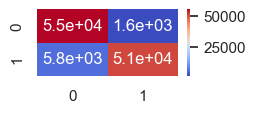

Confusion matrix of randomforest


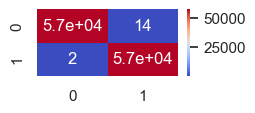

Confusion matrix of XGBoost


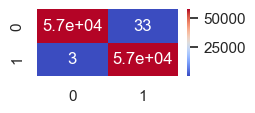

In [194]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

## 🎯Receiver Operating Characteristic with Area Under Curve

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

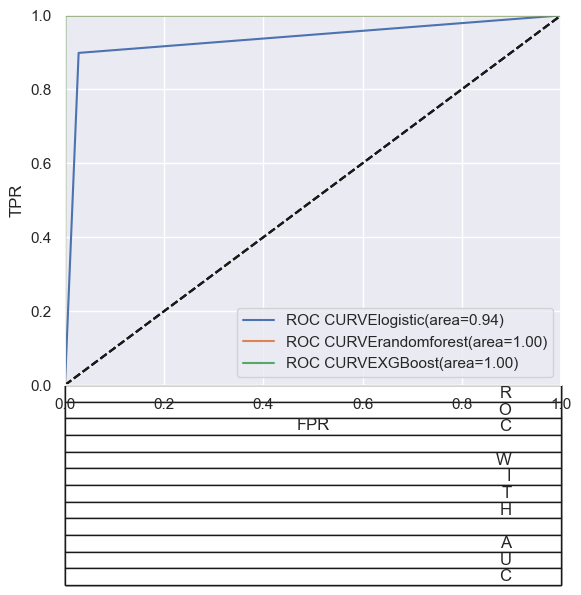

In [196]:
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    roc_auc=roc_auc_score(y_test,y_pred_test)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
    plt.plot(fpr,tpr,label=f'ROC CURVE{model_name}(area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.table('ROC WITH AUC')
    plt.legend(loc='lower right')
plt.show()

In [197]:
from sklearn.metrics import accuracy_score

In [198]:
acc_list=[]
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    acc_list.append(test_acc)

In [199]:
models=[(logistic,'logistic',1),(rf,'randomforest',2),(xgb,'XGBoost',3)]

In [204]:
model=['logistic','randomforest','XGBoost']

In [200]:
acc_list

[0.9356083921003113, 0.9998329317834093, 0.9996834496948807]

In [205]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':acc_list})

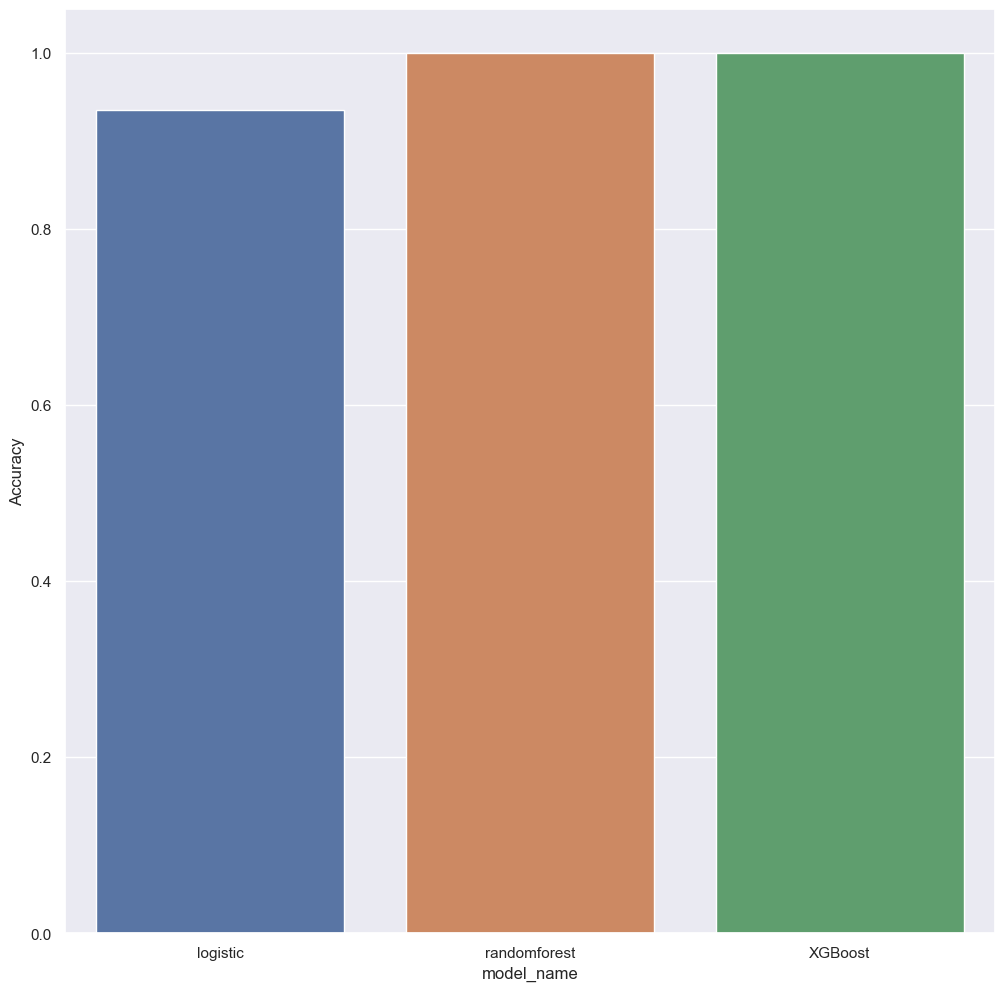

In [206]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

## 🎯Summary:

#### We can observe that all models predicted and gave best accuracy among all of them RandomForest and XGBoost delivered best train accuracy of 99.98% and test accuracy of 99.94% with 'Almost NO VARIENCE'

### BEST MODELS:RANDOMFOREST,XGBOOST